In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Mockup data that would be gathered from database already cleaned

file_path = Path("../../data/processed/Housing_cleaned.csv")

df = pd.read_csv(file_path)

df.head()

,RegionName,StateName,Date,Avg_Price
0,Los Angeles-Long Beach-Anaheim,CA,1996-01-31,191141
1,Miami-Fort Lauderdale,FL,1996-01-31,124246
2,San Francisco,CA,1996-01-31,259705
3,Riverside,CA,1996-01-31,123932
4,San Diego,CA,1996-01-31,190603


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df_fl=df.loc[df["StateName"]== 'FL']
df_fl.set_index('Date', inplace = True)
df_fl.sample(n=10)

,RegionName,StateName,Avg_Price
Date,,,
2002-10-31,Arcadia,FL,79820
2004-05-31,Miami-Fort Lauderdale,FL,237537
1999-09-30,Pensacola,FL,105025
2019-10-31,Panama City,FL,210328
2000-06-30,Lakeland,FL,102335
2008-05-31,Gainesville,FL,206271
2002-04-30,Okeechobee,FL,100306
1997-03-31,Vero Beach,FL,104791
2014-09-30,Okeechobee,FL,114357


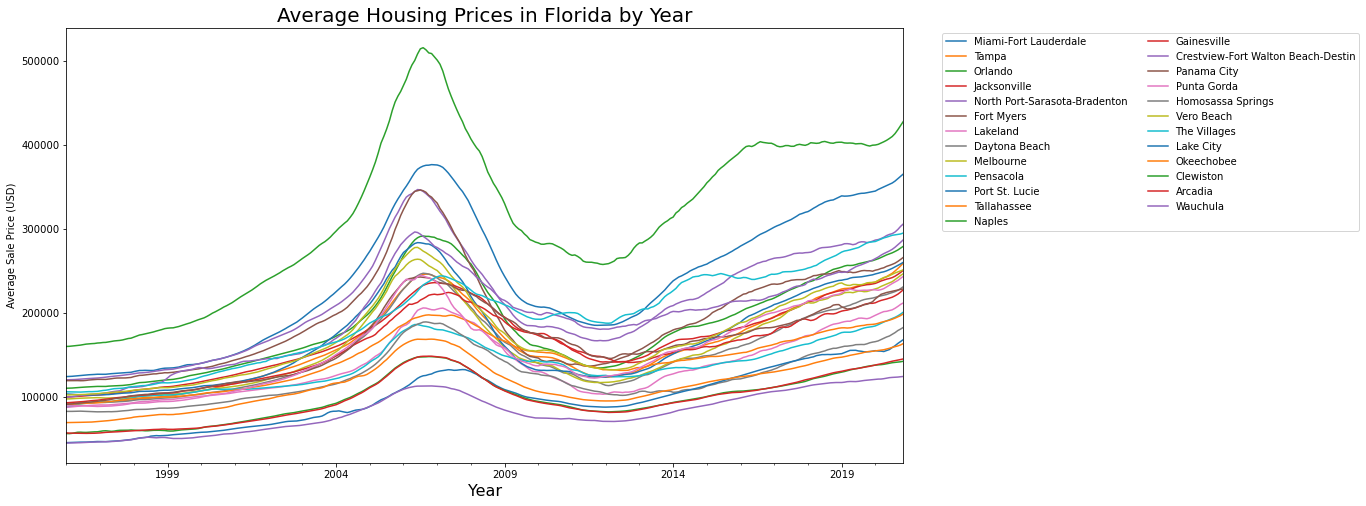

In [6]:
for RegionName in df_fl.RegionName.unique():
    temp_df = df_fl[df_fl.RegionName == RegionName]
    temp_df['Avg_Price'].plot(figsize = (15,8), label=RegionName)

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', ncol=2)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average Sale Price (USD)")
plt.title('Average Housing Prices in Florida by Year', fontsize = 20);

No handles with labels found to put in legend.


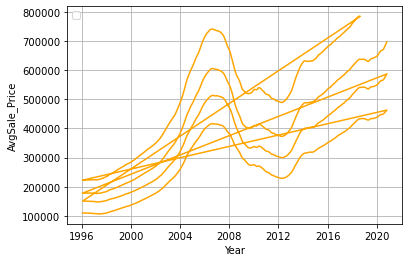

In [31]:
import matplotlib.pyplot as plt

%matplotlib inline
ax = plt.subplot()

ax.plot(df.Date, df.AvgSale_Price, color='orange')

ax.set_xlabel('Year')
ax.set_ylabel('AvgSale_Price')
ax.grid(True)
ax.legend(loc='upper left')

In [6]:
#Target Variable is Price. Thats what we want to predict
#We want to see the relationship between Year and price
import plotly.express as px
fig = px.line(df,x="Date",y="AvgSale_Price",color="no_of_bedrooms")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [12]:
#Declaring features and targets

X = df.No_of_bedrooms.values.reshape(-1,1)
y=df.AvgSale_Price.values.reshape(-1,1)

In [13]:
#instantized and fit data to model
model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

In [14]:
#Print the coeffiecient and intercept of the nodel

print(model.coef_)
print(model.intercept_)

[[75697.64037232]]
[203417.35273517]


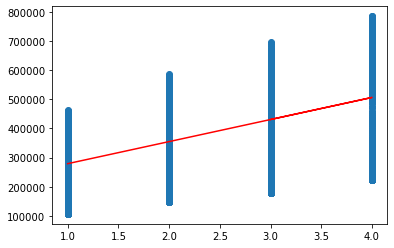

In [15]:
#Print regression line

plt.scatter(X,y)
plt.plot(X, y_pred, color="red")
plt.show()